# Task 1 - Prediction Using Supervised Machine Learning
## Simple Linear Regression

### by SHRIKANT SHRINIWAS BIYANI

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(25, 2)


In [3]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [93]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
df.Hours.unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

# Univariant Analysis

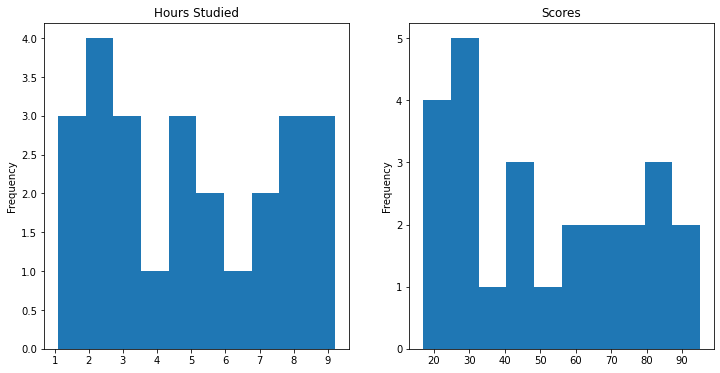

In [3]:
plt.subplot(1, 2, 1)
df["Hours"].plot(kind = "hist",title = "Hours Studied")
plt.subplot(1, 2, 2)
df["Scores"].plot.hist(title = "Scores", figsize = (12,6))

plt.show()

# Bivariant Analysis

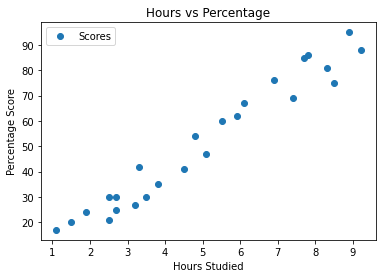

In [4]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### Observation -
            
           from above plot, we can clearly observed that their is Positive Linear Relationship between Studied  hours and Score percentange.

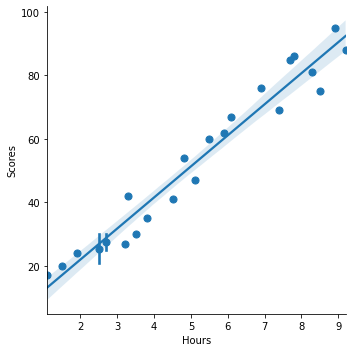

In [20]:
# sns.lmplot(x="Hours", y="Scores", data=df, x_jitter=.25, x_estimator=np.median)

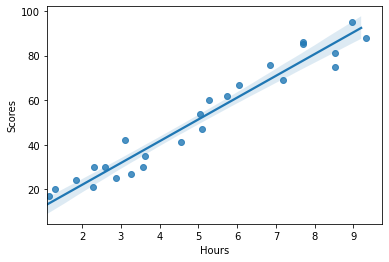

In [18]:
# sns.regplot(x="Hours", y="Scores", data=df, x_jitter=.25)

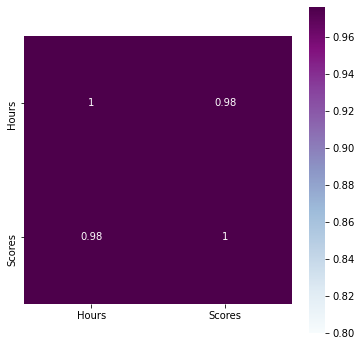

In [5]:
# Correlation between all Numerical variables
# Visualizing it in Heatmap

matrix = df.corr()
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(matrix, vmax = 0.8, square = True, annot=True,cmap = 'BuPu')

# Model Building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score

In [5]:
# spliting Target variables
X = df.iloc[:,:-1].values

# creating new dataset for target variables
y = df.iloc[:,-1].values

X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [6]:
# Splitting Dataframe into Training & Testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train

array([[7.7],
       [6.1],
       [7.4],
       [3.5],
       [3.2],
       [2.7],
       [9.2],
       [5.5],
       [3.8],
       [5.1],
       [2.5],
       [2.5],
       [8.9],
       [7.8],
       [6.9],
       [2.7],
       [8.3],
       [4.5],
       [5.9],
       [1.5]])

In [55]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8]])

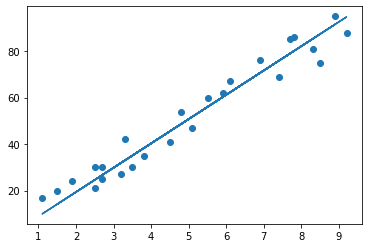

In [7]:
# Create linear regression object
lin_reg = LinearRegression()

# Train the model using the training sets
lin_reg.fit(X_train, y_train)

# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Prediction

In [8]:
# Making predictions using the testing set
pred = lin_reg.predict(X_test)

print("Prediction on X_test Data : \n", pred)

# The coefficients
print('Coefficients: \n', lin_reg.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))

Prediction on X_test Data : 
 [ 9.97026179 32.98470004 18.33914843 87.38246316 48.67636248]
Coefficients: 
 [10.46110829]
Coefficient of determination: 0.84


Mean Absolute Error: 7.882398086270432


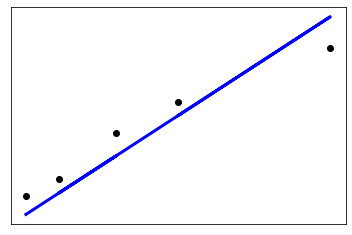

In [9]:
# Plotting ScatterPlot on Test Datasets

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [58]:
# Using Standarized Scale for featuring
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#print(X_train)

[[ 1.02324308]
 [ 0.34531806]
 [ 0.89613214]
 [-0.7563101 ]
 [-0.88342105]
 [-1.09527262]
 [ 1.65879779]
 [ 0.09109617]
 [-0.62919916]
 [-0.07838508]
 [-1.18001324]
 [-1.18001324]
 [ 1.53168685]
 [ 1.0656134 ]
 [ 0.68428057]
 [-1.09527262]
 [ 1.27746496]
 [-0.33260696]
 [ 0.26057743]
 [-1.60371638]]


In [10]:
# Comparing between Actual & Predicted
actual_pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
actual_pred_df

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [11]:
# If a student studies for 9.25 hrs/ day what will be predicted score?

student_study_hrs = [9.25]
student_study_pred = lin_reg.predict([[9.25]])
student_study_pred
print("No. of Hours Student Studied= {}".format(student_study_hrs))
print("Prediction Score = {}".format(student_study_pred[0]))

No. of Hours Student Studied= [9.25]
Prediction Score = 95.22829438402952


# Evaluating Model

In [14]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))

print("Mean Absolute Error : %.2f"
     % mean_absolute_error(y_test, pred))

Mean squared error: 68.88
Mean Absolute Error : 7.88
